# Lesson 4: Image Generation

* In this classroom, the libraries have been already installed for you.
* If you would like to run this code on your own machine, you need to install the following:
    ```
    !pip install -q accelerate torch diffusers transformers comet_ml
    ```

### Set up Comet

In [1]:
import  comet_ml

In [2]:
comet_ml.init(anonymous=True, project_name="4: Diffusion Prompting")

COMET INFO: Comet is now logging experiments in anonymous mode, they will be publicly accessing by using the experiment url


In [3]:
# Create the Comet Experiment for logging
exp = comet_ml.Experiment()

logged_artifact = exp.get_artifact("L4-data", "anmorgan24")
local_artifact = logged_artifact.download("./")

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in '/mnt/ssd2/xin/repo/Prompt-Engineering-for-Vision-Models/L4_Image_Generation' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.
COMET INFO: Experiment is live on comet.com https://www.comet.com/magenta-fort-5177/4-diffusion-prompting/a1cc5e805fdb480998de6f2e6f6c252e

COMET INFO: Artifact 'anmorgan24/L4-data:1.0.0' download has been started asynchronously
COMET INFO: Still downloading 2 file(s), remaining 9.30 MB/9.30 MB
COMET INFO: Artifact 'anmorgan24/L4-data:1.0.0' has been successfully downloaded


### Load images

In [4]:
from PIL import Image

In [5]:
image=Image.open("L4_data/boy-with-kitten.jpg").resize((256, 256))
image_mask=Image.open("L4_data/cat_binary_mask.png").resize((256, 256))

>Note: the images referenced in this notebook have already been uploaded to the Jupyter directory, in this classroom, for your convenience. For further details, please refer to the **Appendix** section located at the end of the lessons.

In [6]:
import matplotlib.pyplot as plt

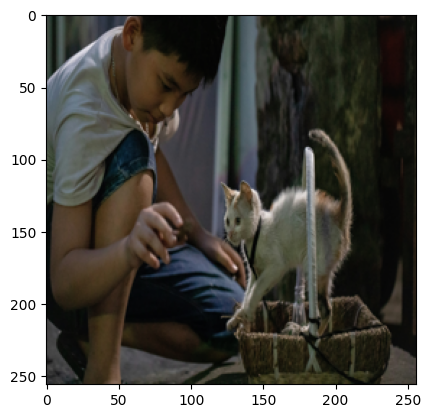

In [7]:
# Print the image
plt.imshow(image)

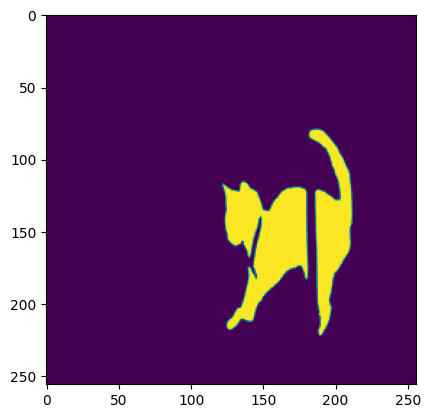

In [8]:
# Print the mask
plt.imshow(image_mask)

### Import and prepare the model

#### Import [torch](https://pytorch.org/).

In [9]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

* Initialize the Stable Diffusion inpainting pipeline.
  -- Note, if you'd like to learn more about the `float16` versus `bfloat16` data type and when you would use one or the other, please check out the short course ["Quantization Fundamentals" Lesson "Data Types and Sizes](https://learn.deeplearning.ai/courses/quantization-fundamentals/lesson/3/data-types-and-sizes)

In [10]:
from diffusers import StableDiffusionInpaintPipeline
sd_pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-inpainting",
    torch_dtype=torch.float16 if torch.cuda.is_available() else torch.bfloat16,
    low_cpu_mem_usage=False if torch.cuda.is_available() else True,
).to(device)

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [11]:
# Set the value of seed manually for reproducibility of the results
seed = 66733
generator = torch.Generator(device).manual_seed(seed)

In [12]:
prompt = "a realistic green dragon"

### Note
- Starting from this point, the code that generates the images will  take too long to run in the given classroom environment. 
  - So the code is left as markdown in the classroom.
- In the classroom, and regardless of whether you have access to GPUs, you can still run the code that retrieves these image generation results using the experiment tracking tool.
> - Thank you for your understanding as we try to make these courses free and accessible to as many people as possible. 💕 💫

- **Hardware requirements:** 
To generate the images taught in this lab, a machine with at least 8 GB of CPU should suffice, and you can expect results within approximately 3 minutes for 3 inference steps. However, for tasks involving 10 steps, using a CPU may extend the execution time to about 10 minutes. Tasks involving 100 steps will significantly prolong the execution time on a CPU.
Alternatively, consider utilizing a GPU for faster processing. With a GPU, such as a local one or through platforms like [Colab GPU](https://colab.research.google.com/), all three steps can be completed in under 1 second.

#### Define new **Comet** experiment.
- The following image generation code will takes hours without a GPU.
- Its results are saved with an experiment tracking tool (Comet), so that you can retrieve them in this classroom environment (and on any computer, regardless of GPU access).

```Python
exp = comet_ml.Experiment()

output = sd_pipe(
  image=image,
  mask_image=image_mask,
  prompt=prompt,
  generator=generator,
  num_inference_steps=3,
)
```


```Python
generated_image = output.images[0]

exp.log_image(
    generated_image,
    name=f"{prompt}",
    metadata={
        "prompt": prompt,
        "seed": seed,
        "num_inference_steps": 3
    }
)

exp.end()
```

In [13]:
exp = comet_ml.Experiment()

output = sd_pipe(
  image=image,
  mask_image=image_mask,
  prompt=prompt,
  generator=generator,
  num_inference_steps=3,
)

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : alleged_xerinae_6054
COMET INFO:     url                   : https://www.comet.com/magenta-fort-5177/4-diffusion-prompting/a1cc5e805fdb480998de6f2e6f6c252e
COMET INFO:   Downloads:
COMET INFO:     artifact assets : 2 (9.30 MB)
COMET INFO:     artifacts       : 1
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     filename                     : 1
COMET INFO:     installed packages           : 1
COMET INFO:     notebook                     : 1
COMET INFO:     os packages  

  0%|          | 0/3 [00:00<?, ?it/s]

In [14]:
generated_image = output.images[0]

exp.log_image(
    generated_image,
    name=f"{prompt}",
    metadata={
        "prompt": prompt,
        "seed": seed,
        "num_inference_steps": 3
    }
)

exp.end()

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : capable_gull_4837
COMET INFO:     url                   : https://www.comet.com/magenta-fort-5177/4-diffusion-prompting/cd7f03ec25844a9dbd82313b88d69285
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     filename                     : 1
COMET INFO:     images                       : 1
COMET INFO:     installed packages           : 1
COMET INFO:     notebook                     : 1
COMET INFO:     os packages                  : 1
COMET INFO:     source_code              

#### Retrieve the experiment results
- Regardless of the environment that you are running in, you can retrieve the results of the experiment using the experiment tracking tool (Comet).

In [15]:
import io

reference_experiment = comet_ml.APIExperiment(
    workspace="ckaiser",
    project_name="4-diffusion-prompting",
    previous_experiment="cd7f03ec25844a9dbd82313b88d69285"
)

reference_image = reference_experiment.get_asset_by_name(f"{prompt}")

COMET INFO: Extra workspace kwarg is ignored
COMET INFO: Extra project_name kwarg is ignored


-  Print the reference_image

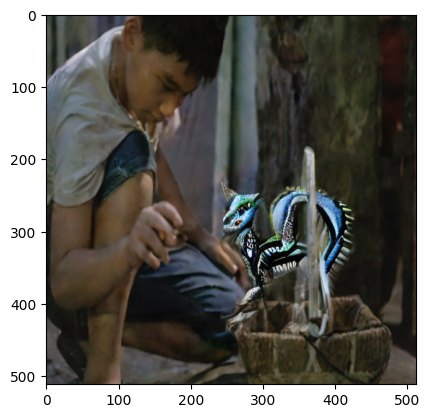

In [16]:
plt.imshow(Image.open(io.BytesIO(reference_image)))

### Note: 
- We'll now explore different hyperparameters.
- As before, running the image generation code would take hours in the classroom environment (or in any environment with GPUs).

* Set up a different 'number of inference steps'.

In [ ]:
exp = comet_ml.Experiment()

prompt = "a realistic green dragon"

exp.log_parameters({
    "seed": seed,
    "num_inference_steps": 100
})

output = sd_pipe(
  image=image,
  mask_image=image_mask,
  prompt=prompt,
  generator=generator,
  num_inference_steps=100,
)

generated_image = output.images[0]

exp.log_image(
    generated_image,
    name=f"{prompt}",
    metadata={
        "prompt": prompt,
        "seed": seed,
        "num_inference_steps": 100
    }
)

exp.end()

#### Retrieve the experiment results
- In the classroom or in any environment, you can retrieve the results of the image generation run by accessing the logs.

In [ ]:
reference_experiment = comet_ml.APIExperiment(
    workspace="ckaiser",
    project_name="4-diffusion-prompting",
    previous_experiment="948c8e6cfd23420c86a0de5f65719955"
)

reference_image = reference_experiment.get_asset_by_name(f"{prompt}")

In [ ]:
plt.imshow(Image.open(io.BytesIO(reference_image)))

#### Set up the different 'Guidance Scale' values.


- This code is best run on a GPU.  It's left as markdown in the classroom.

In [23]:

import numpy as np
guidance_scale_values = [x for x in np.arange(0, 21, 10)]

In [24]:

exp = comet_ml.Experiment()

prompt = "a realistic green dragon"

num_inference_steps = 100 #if torch.cuda.is_available() else 10

exp.log_parameters({
    "seed": seed,
})


COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in '/mnt/ssd2/xin/repo/Prompt-Engineering-for-Vision-Models/L4_Image_Generation' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.
COMET INFO: Experiment is live on comet.com https://www.comet.com/magenta-fort-5177/4-diffusion-prompting/ae9b2d99676a45bdb1083f2dd3d08893



- Pass the guidance_scale to this pipeline

In [25]:

for guidance_scale in guidance_scale_values:

    output = sd_pipe(
      image=image,
      mask_image=image_mask,
      prompt=prompt,
      generator=generator,
      num_inference_steps=num_inference_steps,
      guidance_scale=guidance_scale
    )

    generated_image = output.images[0]

    exp.log_image(
        generated_image,
        name=f"{prompt}",
        metadata={
            "prompt": prompt,
            "seed": seed,
            "num_inference_steps": num_inference_steps,
            "guidance_scale": guidance_scale
        }
    )

exp.end()


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : soft_warbler_5045
COMET INFO:     url                   : https://www.comet.com/magenta-fort-5177/4-diffusion-prompting/ae9b2d99676a45bdb1083f2dd3d08893
COMET INFO:   Parameters:
COMET INFO:     seed : 66733
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     filename                     : 1
COMET INFO:     images                       : 3
COMET INFO:     installed packages           : 1
COMET INFO:     notebook                     : 1
COMET INFO:     os packages        

#### Retrieve the experiment results
- As before, regardless of whether you have access to GPUs or not, you can retrieve the results of the image generation code from the logs.

In [26]:
reference_experiment = comet_ml.APIExperiment(
    workspace="ckaiser",
    project_name="4-diffusion-prompting",
    previous_experiment="ae9b2d99676a45bdb1083f2dd3d08893"
)

reference_experiment.display(tab="images")

COMET INFO: Extra workspace kwarg is ignored
COMET INFO: Extra project_name kwarg is ignored


#### Set up another hyperparameter: 'strength'.

- Add the strength hyperparameter
- This code is best run on a GPU.  It's left as markdown in the classroom.

```Python
strength_values = [x for x in np.arange(0.1, 1.1, 0.2)]
```

```Python
exp = comet_ml.Experiment()

prompt = "a realistic green dragon"

num_inference_steps = 200 if torch.cuda.is_available() else 10

exp.log_parameters({
    "seed": seed,
})

```

```Python
for strength in strength_values:

    output = sd_pipe(
      image=image,
      mask_image=image_mask,
      prompt=prompt,
      generator=generator,
      num_inference_steps=num_inference_steps,
      strength=strength
    )

    generated_image = output.images[0]

    exp.log_image(
        generated_image,
        name=f"{prompt}",
        metadata={
            "prompt": prompt,
            "seed": seed,
            "num_inference_steps": num_inference_steps,
            "strength": strength
        }
    )

exp.end()
```

In [21]:
import numpy as np

strength_values = [x for x in np.arange(0.1, 1.1, 0.2)]

exp = comet_ml.Experiment()

prompt = "a realistic green dragon"

num_inference_steps = 200 if torch.cuda.is_available() else 10

exp.log_parameters({
    "seed": seed,
})
for strength in strength_values:

    output = sd_pipe(
      image=image,
      mask_image=image_mask,
      prompt=prompt,
      generator=generator,
      num_inference_steps=num_inference_steps,
      strength=strength
    )

    generated_image = output.images[0]

    exp.log_image(
        generated_image,
        name=f"{prompt}",
        metadata={
            "prompt": prompt,
            "seed": seed,
            "num_inference_steps": num_inference_steps,
            "strength": strength
        }
    )

exp.end()

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in '/mnt/ssd2/xin/repo/Prompt-Engineering-for-Vision-Models/L4_Image_Generation' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.
COMET INFO: Experiment is live on comet.com https://www.comet.com/magenta-fort-5177/4-diffusion-prompting/8bee4d8660de4975a246f26e05688d4e



  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/140 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : suspicious_lagoon_76
COMET INFO:     url                   : https://www.comet.com/magenta-fort-5177/4-diffusion-prompting/8bee4d8660de4975a246f26e05688d4e
COMET INFO:   Parameters:
COMET INFO:     seed : 66733
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     filename                     : 1
COMET INFO:     images                       : 5
COMET INFO:     installed packages           : 1
COMET INFO:     notebook                     : 1
COMET INFO:     os packages     

#### Retrieve the experiment results
- With experiment tracking, you can compare the most recent run with the earlier ones.

In [22]:
reference_experiment = comet_ml.APIExperiment(
    workspace="ckaiser",
    project_name="4-diffusion-prompting",
    previous_experiment="8bee4d8660de4975a246f26e05688d4e"
)

reference_experiment.display(tab="images")

COMET INFO: Extra workspace kwarg is ignored
COMET INFO: Extra project_name kwarg is ignored


### Try adding a Negative Prompt.
- If you set the negative prompt to "cartoon", this is asking the image generation model to not generate an image that looks like a cartoon.
- Again, the image generation code is best run on a GPU.

In [27]:

exp = comet_ml.Experiment()

prompt = "a realistic green dragon"
negative_prompt = "cartoon"

num_inference_steps = 100 if torch.cuda.is_available() else 10

exp.log_parameters({
    "seed": seed,
})



COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in '/mnt/ssd2/xin/repo/Prompt-Engineering-for-Vision-Models/L4_Image_Generation' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.
COMET INFO: Experiment is live on comet.com https://www.comet.com/magenta-fort-5177/4-diffusion-prompting/f208bf36da0d4c5a99f5bad4ff1c80c4



In [28]:

output = sd_pipe(
  image=image,
  mask_image=image_mask,
  prompt=prompt,
  negative_prompt=negative_prompt,
  generator=generator,
  num_inference_steps=num_inference_steps,
  guidance_scale=10
)

generated_image = output.images[0]

exp.log_image(
    generated_image,
    name=f"{prompt}",
    metadata={
        "prompt": prompt,
        "seed": seed,
        "num_inference_steps": num_inference_steps,
        "guidance_scale": 10
    }
)

exp.end()

  0%|          | 0/100 [00:00<?, ?it/s]

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : proposed_crow_412
COMET INFO:     url                   : https://www.comet.com/magenta-fort-5177/4-diffusion-prompting/f208bf36da0d4c5a99f5bad4ff1c80c4
COMET INFO:   Parameters:
COMET INFO:     seed : 66733
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     filename                     : 1
COMET INFO:     images                       : 1
COMET INFO:     installed packages           : 1
COMET INFO:     notebook                     : 1
COMET INFO:     os packages        

#### Retrieve the experiment results

COMET INFO: Extra workspace kwarg is ignored
COMET INFO: Extra project_name kwarg is ignored


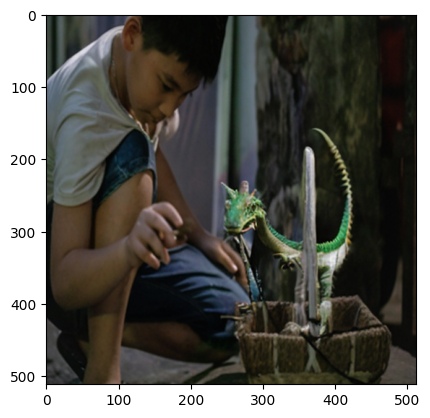

In [29]:
reference_experiment = comet_ml.APIExperiment(
    workspace="ckaiser",
    project_name="4-diffusion-prompting",
    previous_experiment="f208bf36da0d4c5a99f5bad4ff1c80c4"
)

reference_image = reference_experiment.get_asset_by_name(f"{prompt}")

plt.imshow(Image.open(io.BytesIO(reference_image)))


### Additional Resources
* For more on how to use Comet for experiment tracking, check out this [Quickstart Guide](https://colab.research.google.com/drive/1jj9BgsFApkqnpPMLCHSDH-5MoL_bjvYq?usp=sharing) and the [Comet Docs](https://www.comet.com/docs/v2/).
* This course was based off a set of two blog articles from Comet. Explore them here for more on how to use newer versions of Stable Diffusion in this pipeline, additional tricks to improve your inpainting results, and a breakdown of the pipeline architecture:
  * [SAM + Stable Diffusion for Text-to-Image Inpainting](https://www.comet.com/site/blog/sam-stable-diffusion-for-text-to-image-inpainting/)
  * [Image Inpainting for SDXL 1.0 Base Model + Refiner](https://www.comet.com/site/blog/image-inpainting-for-sdxl-1-0-base-refiner/)